In [1]:
import tensorflow as tf # Tensorflow is a neural network and deep neural network library
from tensorflow import keras # Keras is a high-level wrapper that makes working with tensorflow easier
from tensorflow.keras import layers # Layers contains different types of layers such as Dense, Convolutional, Recurrent

import numpy as np
import pandas as pd

In [2]:
# load dataset
df = pd.read_csv("song_data.csv")
df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness,Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity Score,Lyrics
0,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,"Ooo ooo ooo ooo ooo\nI ain't happy, I' m feeli..."
1,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Keep you in the dark\nYou know they all preten...
2,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45,"The road ahead is empty\nIt's paved, with mile..."
3,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74,Beauty queen of only eighteen\nShe had some tr...
4,Knights of Cydonia,Muse,modern rock,2006,137,96,37,-5,12,21,366,0,14,69,Come ride with me\nThrough the veins of histor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,Dazed and Confused,Led Zeppelin,album rock,1969,87,55,27,-10,10,43,386,4,5,63,"Been dazed and confused\nFor so long, it's not..."
1089,The First Time Ever I Saw Your Face,Roberta Flack,adult standards,1969,121,3,31,-22,16,14,261,73,4,64,"The first time ever, I saw your face\nI though..."
1090,Summertime,Brainbox,dutch prog,1969,89,55,38,-9,31,25,263,4,3,36,Summertime\nAnd the livin' is easy\nFish are j...
1091,Midnight Rambler,The Rolling Stones,album rock,1969,75,66,40,-10,17,51,413,77,12,50,Did you hear about the midnight rambler?\nEver...


,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness,Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity Score
Year,1.000000,0.014547,0.153300,0.053860,0.359268,0.000306,-0.198251,0.005913,-0.142338,0.038956,-0.073204
Beats Per Minute (BPM),0.014547,1.000000,0.168290,-0.128517,0.103382,0.010043,0.072438,-0.007867,-0.144860,0.095974,0.007070
Energy,0.153300,0.168290,1.000000,0.119494,0.730879,0.205657,0.404715,0.030761,-0.672827,0.237052,0.063192
Danceability,0.053860,-0.128517,0.119494,1.000000,0.016101,-0.060730,0.525573,-0.149432,-0.080294,0.113672,0.137995
Loudness,0.359268,0.103382,0.730879,0.016101,1.000000,0.135235,0.130610,-0.032052,-0.447845,0.162116,0.127321
Liveness,0.000306,0.010043,0.205657,-0.060730,0.135235,1.000000,0.069499,0.048676,-0.097493,0.075166,-0.053051
Valence,-0.198251,0.072438,0.404715,0.525573,0.130610,0.069499,1.000000,-0.238551,-0.261136,0.120113,0.119320
Length (Duration),0.005913,-0.007867,0.030761,-0.149432,-0.032052,0.048676,-0.238551,1.000000,-0.056536,-0.014655,-0.107873
Acousticness,-0.142338,-0.144860,-0.672827,-0.080294,-0.447845,-0.097493,-0.261136,-0.056536,1.000000,-0.105846,-0.035202
Speechiness,0.038956,0.095974,0.237052,0.113672,0.162116,0.075166,0.120113,-0.014655,-0.105846,1.000000,0.115946


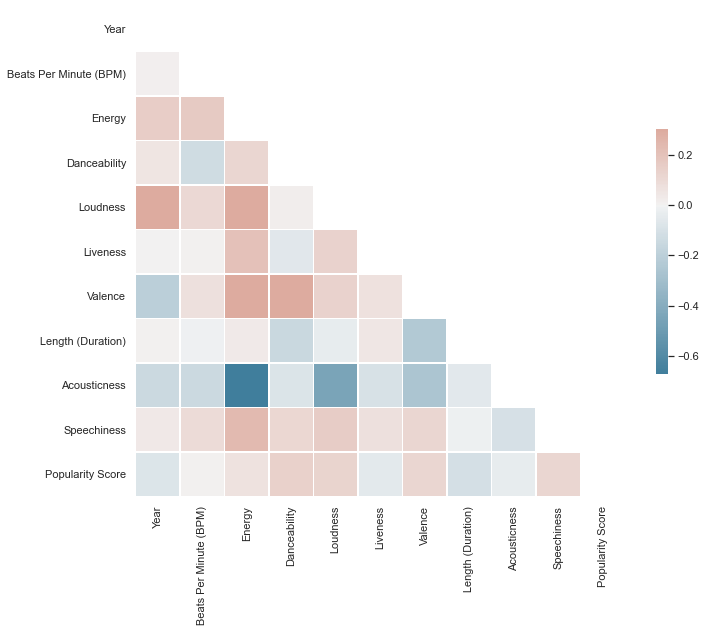

In [3]:
#  data visualisation

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

In [4]:
df = df.drop(["Title", "Artist", "Top Genre", "Year", "Lyrics"], axis=1)

In [5]:
# df["Length (Duration)"] = df["Length (Duration)"].str.replace(r',', '')


In [6]:
# print(df.shape)
df["Popularity Score"] = np.where(df["Popularity Score"] <= 63, 0, 1)


In [7]:
df

,Beats Per Minute (BPM),Energy,Danceability,Loudness,Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity Score
0,168,69,66,-9,7,52,341,2,17,1
1,173,96,43,-4,3,37,269,0,4,1
2,99,46,54,-9,14,14,247,0,2,0
3,102,71,71,-6,13,54,257,6,3,1
4,137,96,37,-5,12,21,366,0,14,1
...,...,...,...,...,...,...,...,...,...,...
1088,87,55,27,-10,10,43,386,4,5,0
1089,121,3,31,-22,16,14,261,73,4,1
1090,89,55,38,-9,31,25,263,4,3,0
1091,75,66,40,-10,17,51,413,77,12,0


In [8]:
y = df["Popularity Score"]
x = df.drop(["Popularity Score"],axis=1)
print(x)

      Beats Per Minute (BPM)  Energy  Danceability  Loudness  Liveness  \
0                        168      69            66        -9         7   
1                        173      96            43        -4         3   
2                         99      46            54        -9        14   
3                        102      71            71        -6        13   
4                        137      96            37        -5        12   
...                      ...     ...           ...       ...       ...   
1088                      87      55            27       -10        10   
1089                     121       3            31       -22        16   
1090                      89      55            38        -9        31   
1091                      75      66            40       -10        17   
1092                     119      24            75       -15         9   

      Valence  Length (Duration)  Acousticness  Speechiness  
0          52                341             2   

In [ ]:
"""
Neural Network Model
"""

In [32]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # print(inputs)
    # standardize
    #  what if i dont flatten?
    # x = inputs
    x = layers.Rescaling(1.0 / 100)(inputs)
    # x = layers.Flatten()(x)
    # Part 1 left optimise and Part 2 done
    # hidden layers relu and sigmoid
    x = layers.Dense(8, activation="relu")(x)
    # x = layers.Dense(4, activation="sigmoid")(x)
    x = layers.Dense(2, activation="sigmoid")(x)
    # Write dense layers with non-linear activation here.
    activation = "softmax"
    units = num_classes # num_class would be different for MNIST.
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

image_size = (9)
model = make_model(input_shape=image_size, num_classes=1)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [35]:
import numpy as np
from sklearn.model_selection import train_test_split

# Part 3
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

print(len(x_train))
print(len(x_val))
print(len(x_test))

535
328
230


In [36]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10, # You can change it
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy", # You would need to change here for MNIST; use categorical crossentropy
    metrics=["accuracy"],
)
x_train = np.asarray(x_train).astype(np.int)
y_train = np.asarray(y_train).astype(np.int)
x_test = np.asarray(x_test).astype(np.int)
x_test = np.asarray(x_test).astype(np.int)
y_test = np.asarray(y_test).astype(np.int)
x_val = np.asarray(x_val).astype(np.int)
y_val = np.asarray(y_val).astype(np.int)

model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=8,
    callbacks=callbacks,
    validation_data=(x_val,y_val),
)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/10


<ipython-input-36-8d0585efb5b3>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = np.asarray(x_train).astype(np.int)
<ipython-input-36-8d0585efb5b3>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy

67/67 [==============================] - 2s 9ms/step - loss: 0.0000e+00 - accuracy: 0.4841 - val_loss: 0.0000e+00 - val_accuracy: 0.4817
Epoch 2/10
67/67 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.4841 - val_loss: 0.0000e+00 - val_accuracy: 0.4817
Epoch 3/10
67/67 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.4841 - val_loss: 0.0000e+00 - val_accuracy: 0.4817
Epoch 4/10
67/67 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.4841 - val_loss: 0.0000e+00 - val_accuracy: 0.4817
Epoch 5/10
67/67 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4841 - val_loss: 0.0000e+00 - val_accuracy: 0.4817
Epoch 6/10
67/67 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4841 - val_loss: 0.0000e+00 - val_accuracy: 0.4817
Epoch 7/10
67/67 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 0.4841 - val_loss: 0.0000e

In [20]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [21]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
"""
Regressions
"""

In [ ]:
import pandas
df = 


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
# create a LinearRegression object
model = LinearRegression()

# fit the model using your training data
model.fit(x_train, y_train)

# make predictions using your test data
y_pred = model.predict(x_test)

print(accuracy_score(y_test,y_pred))
# print(y_pred)
# print(y_test)
# count = 0
# for i in range(len(y_pred)):
#     if y_pred[i] <0.63:
#         y_pred[i]=0
#     else:
#         y_pred[i]=1

#     if y_pred[i] == y_test[i]:
#         count +=1
# print(count/len(y_test))


ValueError: Classification metrics can't handle a mix of binary and continuous targets

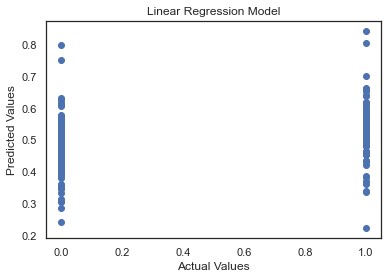

In [23]:
import matplotlib.pyplot as plt

# plot the actual values vs predicted values
plt.scatter(y_test, y_pred)

# add a label for the x-axis
plt.xlabel('Actual Values')

# add a label for the y-axis
plt.ylabel('Predicted Values')

# add a title to the plot
plt.title('Linear Regression Model')

# show the plot
plt.show()


In [ ]:
import numpy as np
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db


def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')


def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X


def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses


def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)


In [ ]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy
accuracy(X, y_hat=predict(X))